In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" 

## training set

In [47]:
train = pd.read_csv('titanic/train.csv')
# print("num records={}".format(train.shape[0]))
train.head()
# train.info()

s = train.isnull().sum()
for i, v in s.items():
    if(v != 0):
        print("{0:<20s} Non Null {1}".format(i,v))
    

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Age                  Non Null 177
Cabin                Non Null 687
Embarked             Non Null 2


'PassengerId' --id
 'Ticket',  --ticket #
 'Name', 
 'Cabin' --cabin #

--yhat
'Survived', --1 for survived

--dont use
 'Fare',  -- $ paid

--use
'Pclass', --values 1 for upper,2,3 for lower
 'SibSp',  -- # of sybilings?
 'Parch',  -- 0 for nanny
'Embarked' -- S, C or Q for port of embarkation

--use, needs buckets
 'Age',  --numeric 0 to 80 ish

--use, needs dummies
  'Sex', --male or female 

In [114]:
train1 = train.drop(['Ticket','Cabin','PassengerId'],axis=1)

train1.Embarked.fillna(train.Embarked.mode()[0], inplace=True)
train1.Age.fillna(train1.Age.mean(), inplace=True)
train1.Fare.fillna(train1.Fare.mean(), inplace=True)
train1['FamilySize'] = train1.SibSp + train1.Parch

train1['Sex'] = train.Sex.map(dict(zip(("female","male"),(0,1))))
train1["Embarked"] = train1["Embarked"].map(dict(zip(("S", "C", "Q"), (0, 1, 2))))

train1.Sex.value_counts(dropna=False)
train1.Embarked.value_counts(dropna=False)
train1.FamilySize.value_counts(dropna=False)
# train1 = pd.get_dummies(train1,columns=['Embarked'])
train1.head()

s = train1.isnull().sum()
for i, v in s.items():
    if(v != 0):
        print("{0:<20s} Non Null {1}".format(i,v))
        
train1.info()

1    577
0    314
Name: Sex, dtype: int64

0    646
1    168
2     77
Name: Embarked, dtype: int64

0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: FamilySize, dtype: int64

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,1,1
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,0,1
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Name          891 non-null object
Sex           891 non-null int64
Age           891 non-null float64
SibSp         891 non-null int64
Parch         891 non-null int64
Fare          891 non-null float64
Embarked      891 non-null int64
FamilySize    891 non-null int64
dtypes: float64(2), int64(7), object(1)
memory usage: 69.7+ KB


In [154]:
import re
titles = list()
for row in train1["Name"]:
    surname, title, name = re.split(r"[,.]", row, maxsplit=2)
    titles.append(title.strip())
train1["Title"] = titles
#     df.drop("Name", axis=1, inplace=True)


for key, value in zip(("Mr", "Mrs", "Miss", "Master", "Dr", "Rev"),np.arange(6)):
    train1.loc[train1["Title"] == key, "Title"] = value
    train1.loc[train1["Title"] == "Ms", "Title"] = 1
    for title in "Major", "Col", "Capt":
        train1.loc[train1["Title"] == title, "Title"] = 6
    for title in "Mlle", "Mme":
        train1.loc[train1["Title"] == title, "Title"] = 7
    for title in "Don", "Sir":
        train1.loc[train1["Title"] == title, "Title"] = 8
    for title in "Lady","the Countess":
        train1.loc[train1["Title"] == title, "Title"] = 9

train1.loc[train1["Title"] == "Jonkheer", "Title"] = 9
train1.Title.value_counts(dropna=False)

0    517
2    182
1    126
3     40
4      7
5      6
6      5
9      3
7      3
8      2
Name: Title, dtype: int64

Accuracy: 0.749 ['Pclass', 'Sex', 'AgeCat', 'Fare', 'FamilySize', 'Embarked']
Accuracy: 0.722 ['Pclass', 'Sex', 'AgeCat', 'FareCat', 'FamilySize', 'Embarked']
Accuracy: 0.695 ['Pclass', 'Sex', 'AgeCat2', 'FareCat', 'FamilySize', 'Embarked']


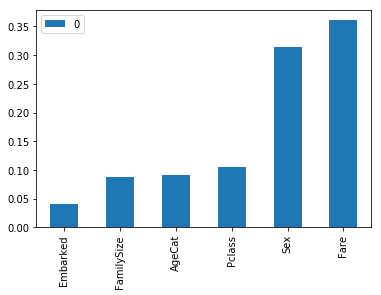

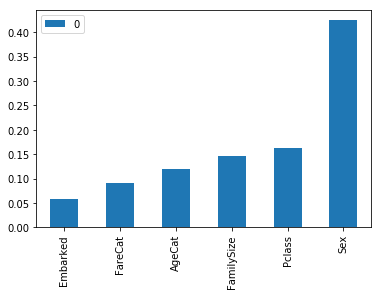

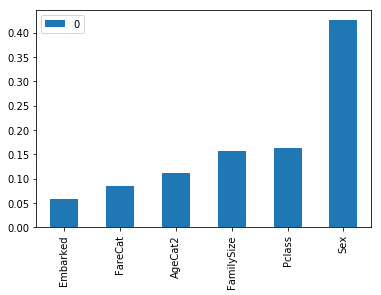

In [209]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
# from sklearn.ensemble import RandomForestClassifier

def genRf(predictors):
    X_train, X_test, y_train, y_test = train_test_split(train1[predictors], train1["Survived"])
    X_train.head()

    rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
    rf.fit(X_train, y_train)
    predictions = rf.predict(X_test).astype('int')

    errors = abs(predictions - y_test)
#     print('Accuracy:', 1 - np.count_nonzero(errors) / errors.size)
    print("Accuracy: {0:.3f} {1}".format(1 - np.count_nonzero(errors) / errors.size, predictors))

    pd.DataFrame(data=rf.feature_importances_\
                 ,index=predictors).sort_values(0).plot.bar();
    
# genRf(['Pclass', 'Sex', 'Age', 'Fare', 'Embarked'])
# genRf(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'])
# genRf(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked','FamilySize','Title'])
# genRf(['Pclass', 'Sex', 'AgeCat', 'Fare', 'Embarked','FamilySize','Title'])
# genRf(['Pclass', 'Sex', 'Age', 'Fare', 'FamilySize','Title'])

genRf(['Pclass', 'Sex', 'AgeCat','Fare','FamilySize','Embarked'])
genRf(['Pclass', 'Sex', 'AgeCat','FareCat','FamilySize','Embarked'])
genRf(['Pclass', 'Sex', 'AgeCat2','FareCat','FamilySize','Embarked'])


In [ ]:
# can i do a stacked by color of age
plt.ylabel('# passengers')
plt.xlabel('age')
plt.hist(train.Age.dropna());

In [ ]:
predictors = ["Pclass", "Sex", "Age", "SibSp", "Parch",
              "Fare", "Embarked", "FamilySize", "Title"]

In [ ]:
train[['Age']].dropna().sort_values('Age').Age.unique()

In [161]:
def AgeCat (x):
    if x < 18:
        return 0
    elif x < 36:
        return 1
    elif x < 45:
        return 2
    elif x < 60:
        return 3
    else:
        return 4

train1['AgeCat'] = train.Age.apply(lambda x: AgeCat(x))
train1.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,Title,AgeCat
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,0,1,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,1,1,1,2
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,0,0,2,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,0,1,1,1
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,0,0,0,1


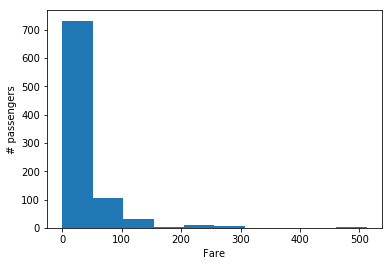

In [215]:
plt.ylabel('# passengers')
plt.xlabel('Fare')
plt.hist(train.Fare[train.Fare <= 1000].dropna());

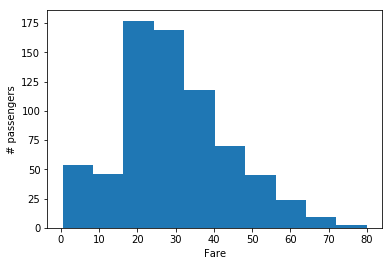

In [216]:
plt.ylabel('# passengers')
plt.xlabel('Fare')
plt.hist(train.Age.dropna());

In [213]:
train1["FareCat"] = pd.cut(train1.Fare,[-1,20,40,60,80,100,200,300,800],labels=[0,1,2,3,4,5,6,7])
train1.FareCat.value_counts(dropna=False)

train1["AgeCat2"] = pd.cut(train1.Age,[-1,17,25,35,45,60,100],labels=[0,1,2,3,4])
train1.AgeCat2.value_counts(dropna=False)

# train1[train1.Age == 19]

# train1[pd.isna(train1.FareCat)]

0    515
1    200
2     54
3     48
5     33
4     21
6     17
7      3
Name: FareCat, dtype: int64

1    557
0    139
2     92
3     81
4     22
Name: AgeCat2, dtype: int64

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,Title,AgeCat,FareCat,AgeCat2
27,0,1,"Fortune, Mr. Charles Alexander",1,19.0,3,2,263.0000,0,5,0,1,6,1
44,1,3,"Devaney, Miss. Margaret Delia",0,19.0,0,0,7.8792,2,0,2,1,0,1
67,0,3,"Crease, Mr. Ernest James",1,19.0,0,0,8.1583,0,0,0,1,0,1
136,1,1,"Newsom, Miss. Helen Monypeny",0,19.0,0,2,26.2833,0,2,2,1,1,1
143,0,3,"Burke, Mr. Jeremiah",1,19.0,0,0,6.7500,2,0,0,1,0,1
145,0,2,"Nicholls, Mr. Joseph Charles",1,19.0,1,1,36.7500,0,2,0,1,1,1
191,0,2,"Carbines, Mr. William",1,19.0,0,0,13.0000,0,0,0,1,0,1
192,1,3,"Andersen-Jensen, Miss. Carla Christine Nielsine",0,19.0,1,0,7.8542,0,1,2,1,0,1
226,1,2,"Mellors, Mr. William John",1,19.0,0,0,10.5000,0,0,0,1,0,1
238,0,2,"Pengelly, Mr. Frederick William",1,19.0,0,0,10.5000,0,0,0,1,0,1


In [ ]:
train1 = train.drop(['Fare','PassengerId','Ticket','Name','Cabin','Age','Embarked','Sex'],axis=1)
# train1 = pd.get_dummies(train1,columns=['Sex'])
# train1 = train1.drop(['SibSp','Parch','AgeCat','Sex_female','Sex_male'],axis=1)
# train1 = train1.drop(['AgeCat'],axis=1)
train1.head()

In [ ]:
pd.DataFrame(data=rf.feature_importances_\
             ,index=feature_list).sort_values(0).plot.bar();

In [ ]:
bins = pd.IntervalIndex.from_tuples([(0, 1), (2, 3), (4, 5)])
# pd.cut([0, 0.5, 1.5, 5, 4.5], bins)
pd.cut([5], bins)
# [NaN, (0, 1], NaN, (2, 3], (4, 5]]
# Categories (3, interval[int64]): [(0, 1] < (2, 3] < (4, 5]]